<h1>Linear Regression on King's County Housing Data</h1>
<p>Here, I will show you how to predict house prices using linear regression</p>
<ol>
    <li><b>Ordinary Least Squares Method (based on only one feature)</b></li>
    <li><b>Linear Regression using Scikit-Learn</b></li>
</ol>

<h2>Libraries used</h2>
<ul>
    <li>Numpy, for managing data</li>
    <li>Matplotplib, for visualization</li>
    <li>Pandas, for working with data</li>
    <li>csv, for reading csv files</li>
    <li>Scikit-learn, for using machine learning algorithms</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import  metrics

<h3>Reading CSV File</h3>
<p>The CSV file is downloaded from <a href="https://www.kaggle.com/harlfoxem/housesalesprediction">here</a>. This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.<br>
It's a great dataset for evaluating simple regression models.</p>
<p>Thre are <b>19</b> house features plus the <b>price</b> and the <b>id</b> columns, along with <b>21613</b> observations</p>

In [2]:
dataset = pd.read_csv('kc_house_data.csv')
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB
None


<h2>Ordinary Least Squares Regression (based on only one feature)</h2>
<p>Here, I will use the least squares regression model to predict the house price based on only one input variable, sq. ft. of living.</p>
<p>The formula for ordinary least squares regression looks as follows :-</p>
<img src="https://i.stack.imgur.com/lYevl.gif" />
<p>To find the best fit for our data, we calculate theta0 (b0) and theta1 (b1), as shown above</p>

<h3>Obtaining sq.ft. and house price columns from our dataset</h3>
<p>Using pandas, we can easily fetch the required columns as shown below</p>
<p>Let's visualize these two columns to check if there is any relationship between them</p>
<p>As we use Matplotlib, we can easily make a scatter plot between the two quantities</p>

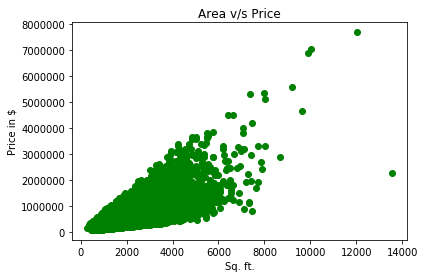

In [3]:
sqft_living = dataset['sqft_living'].values
house_prices = dataset['price'].values

plt.scatter(sqft_living, house_prices, color='green')
plt.xlabel('Sq. ft.')
plt.ylabel('Price in $')
plt.title('Area v/s Price')
plt.show()

<h3>Finding theta0 and theta1 using the formula</h3>
<p>With the help of Numpy and Pandas.Series method, we can easily compute mean, difference between the individual values and the mean, square of a quantity, etc.</p>
<p>Using the mentioned formula, we can fint the parameters theta0 and theta1</p>

In [4]:
sqft_living_mean = sqft_living.mean()
house_prices_mean = house_prices.mean()

theta1 = (np.sum((house_prices - house_prices_mean) * (sqft_living - sqft_living_mean))) / (np.sum((sqft_living - sqft_living_mean) ** 2))
print("theta1 (b1) : ", theta1)

theta0 = house_prices_mean - (theta1 * sqft_living_mean)
print("theta0 (b0) : ", theta0)

theta1 (b1) :  280.6235678974483
theta0 (b0) :  -43580.74309447408


<h3>Plotting the regression line</h3>
<p>Using the parameters theta0 and theta1, we can plot it on the scatter plot using the Matplotlib library</p>
<p>The regression line is shown in red colour</p>

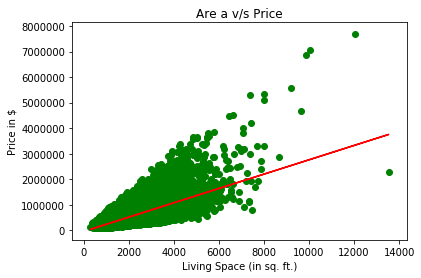

In [5]:
plt.plot(sqft_living, theta0 + theta1 * sqft_living, '-r')
plt.scatter(sqft_living, house_prices, color='green')
plt.xlabel('Living Space (in sq. ft.)')
plt.ylabel('Price in $')
plt.title('Are a v/s Price')
plt.show()

<h3>Calculating error in our prediction</h3>
<p>We will use the RMSE (Root Mean Squared Error) for calculating error in our predictions</p>
<img src="https://cdn-images-1.medium.com/max/2400/1*qYxwsMuaYfhINbq3EteRYQ.png" />

In [6]:
rmse = np.sqrt(np.sum(((theta0 + theta1 * sqft_living) - house_prices) ** 2).mean())
print("Root Mean Squared Error : ",rmse)

Root Mean Squared Error :  38435353.02716094


<h2>Linear Regression using Scikit-learn (with multiple features)</h2>
<p>We will be using scikit-learn's LinearRegression module to perform linear regression on data</p>
<p>First step is to collect our features on which we will train our model. The feature I have used is 'sq.ft' living'</p>
<p>Next, we split our dataset for training and testing purposes. We split our dataset as 70% for training and 30% for testing</p>
<p>Next, use the Linear Regression model from 'sklearn' module and train it with our training data</p>

In [10]:
features = dataset[['sqft_living']]

X_train, X_test, Y_train, Y_test = train_test_split(features,house_prices,test_size=0.3,random_state=42)

reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<h3>Plotting the regression line</h3>
<p>We visualize the regression line on the scatter plot to verify that our linear regression works as per our expectations.</p>

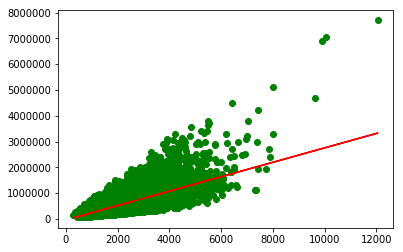

In [8]:
plt.scatter(X_train, Y_train, color="green")
plt.plot(X_train, reg.predict(X_train), color="red")
plt.show()

<h3>Calculating in our predictions</h3>
<p>We will calculate our error by using the test set on our linear regression model with the help of 'mean_squared_error' function from 'metric' submodule of 'sklearn' library.</p>

In [9]:
Y_pred = reg.predict(X_test)
mse = metrics.mean_squared_error(Y_pred,Y_test)
print("Root Mean Squared Error : ", np.sqrt(mse))

Root Mean Squared Error :  272965.1870779423
